In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, classification_report
from src.modelado import dividir_variables
from src.modelado import dividir_datos
from src.modelado import pipeline_preprocesamiento
from src.modelado import entrenar_modelo_clasificacion
from src.modelado import evaluar_clasificacion
from src.modelado import entrenar_logreg_cv

best_model = entrenar_logreg_cv(prep, X_train, y_train)




In [4]:
df = pd.read_csv("../data/tattoo_studio_clean.csv")
df.head()


,Age,Gender,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Final_Rate,Customer_Satisfaction
0,46,Female,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,47647,3
1,32,Male,Saturday,Walk-in,Small,Custom,Artist C,1,42498,2
2,25,Male,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,19778,1
3,38,Female,Friday,Pre-booked,Medium,Script,Artist D,4,5478,4
4,36,Male,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,32471,1


In [5]:
y = df["Customer_Satisfaction"]
X = df.drop(columns=["Customer_Satisfaction"])
X.head(), y.head()

(   Age  Gender Day_of_Week Session_Type  Tattoo_Size Tattoo_Style Artist_Name  \
 0   46  Female      Friday   Pre-booked  Sleeve/Back   Minimalist    Artist B   
 1   32    Male    Saturday      Walk-in        Small       Custom    Artist C   
 2   25    Male      Friday   Pre-booked  Sleeve/Back       Custom    Artist A   
 3   38  Female      Friday   Pre-booked       Medium       Script    Artist D   
 4   36    Male   Wednesday   Pre-booked  Sleeve/Back       Tribal    Artist B   
 
    Session_Hours  Final_Rate  
 0              9       47647  
 1              1       42498  
 2             10       19778  
 3              4        5478  
 4             10       32471  ,
 0    3
 1    2
 2    1
 3    4
 4    1
 Name: Customer_Satisfaction, dtype: int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((1600, 9), (400, 9))

In [7]:
columnas_numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
columnas_categoricas = X.select_dtypes(include=["object"]).columns.tolist()

columnas_numericas, columnas_categoricas

(['Age', 'Session_Hours', 'Final_Rate'],
 ['Gender',
  'Day_of_Week',
  'Session_Type',
  'Tattoo_Size',
  'Tattoo_Style',
  'Artist_Name'])

In [8]:
preprocesamiento = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), columnas_categoricas),
        ("num", StandardScaler(), columnas_numericas)
    ]
)

In [9]:
from sklearn.linear_model import LogisticRegression

modelo = Pipeline(steps=[
    ("preprocesamiento", preprocesamiento),
    ("clf", LogisticRegression(max_iter=200))
])

In [10]:
modelo.fit(X_train, y_train)


,steps,"[('preprocesamiento', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
y_pred = modelo.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Reporte de clasificación:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.1675

🔹 Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.19      0.27      0.23        85
           2       0.19      0.24      0.21        86
           3       0.12      0.09      0.11        77
           4       0.16      0.17      0.17        82
           5       0.07      0.03      0.04        70

    accuracy                           0.17       400
   macro avg       0.15      0.16      0.15       400
weighted avg       0.15      0.17      0.16       400



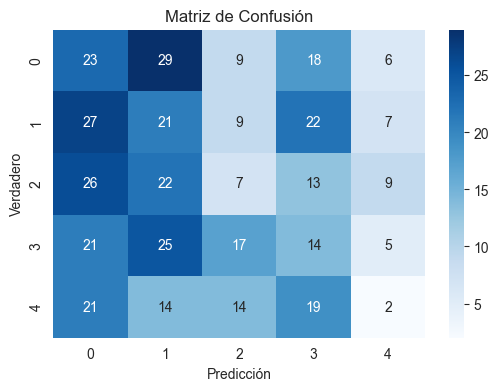

In [12]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


In [13]:
df['Customer_Satisfaction'].value_counts(normalize=True)


Customer_Satisfaction
2    0.2140
1    0.2125
4    0.2045
3    0.1935
5    0.1755
Name: proportion, dtype: float64